# Predicting Heart Attacks

You have a dataset that contains a range of health information for multiple participants. The dataset also contains a target the occurance of a heart attack.
The purpose of this practical is to try to train the best possible model that can **predict the occurance of a heart attack**, based on the health measurements for a person.

### Dataset ###
- age : Age of the patient
- sex : Sex of the patient
- cp: Chest pain type - 0: Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps : Resting blood pressure (in mm Hg)
- chol : Cholesterol in mg/dl fetech via BMI sensor
- fbs : Fasting blood sugar > 120 mg/dl - 1: True, 0: False
- restecg : Resting electrocardiographic result - 0: normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh : Maximum heart rate achieved
- oldpeak : Previous peak
- slp : slope
- caa : Number of major vessels
- thall : Thalium Stress Test result - (0, 3) range
- exng : Exercise induced angina - 1: Yes, 0: No
- output : Target variable - 0: no heart attack, 1: had heart attack

## Preparation

Load libraries and dataset

In [1]:
# Load libraries and dataset

import pandas as pd

In [2]:
#ToDo: Check your dataset using using head, shape, info
# head
df = pd.read_csv('heart.csv')

In [44]:
#ToDo shape
df.shape

(302, 14)

In [43]:
#ToDo check datatypes (info)
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data cleaning

#### Null values
Check for null values. You can use the function `isnull()` which generates a data frame with `True` for every entry that is null. By applying the `sum()` on each column, you can get the count of nulls in each feature. 

In [45]:
# check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### Duplicates
Check for duplicates using the function `duplicated()`. This function returns `True` for every row that is duplicated. 

In [46]:
# Check for duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 302, dtype: bool

You can inspect closer the duplicated rows by selecting a range around that row id.

In [47]:
# ToDo: select range 160-170 of the dataset
df.iloc[160:170].duplicated()

160    False
161    False
162    False
163    False
165    False
166    False
167    False
168    False
169    False
170    False
dtype: bool

Remove duplicates using [drop_duplicates()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) function. Check the documentation and consider the parameters `keep='first'` and `inplace=True` to keep the first occurance, and to make sure the action changes the current dataset.

In [48]:
#ToDo drop duplicates
#ToDo drop duplicates
df.drop_duplicates(keep = 'first', inplace=True)



In [49]:
#ToDo check shape to make sure your duplicate is droppped
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


## Exploratory Data Analysis

In [50]:
# ToDo: look at basic statistics using describe()
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Distributions
Plot distributions of the values. Look at previous practicals and lecture notes (**Lecture 3**) to produce a multi-figure with histograms of the valud distributions for each feature.

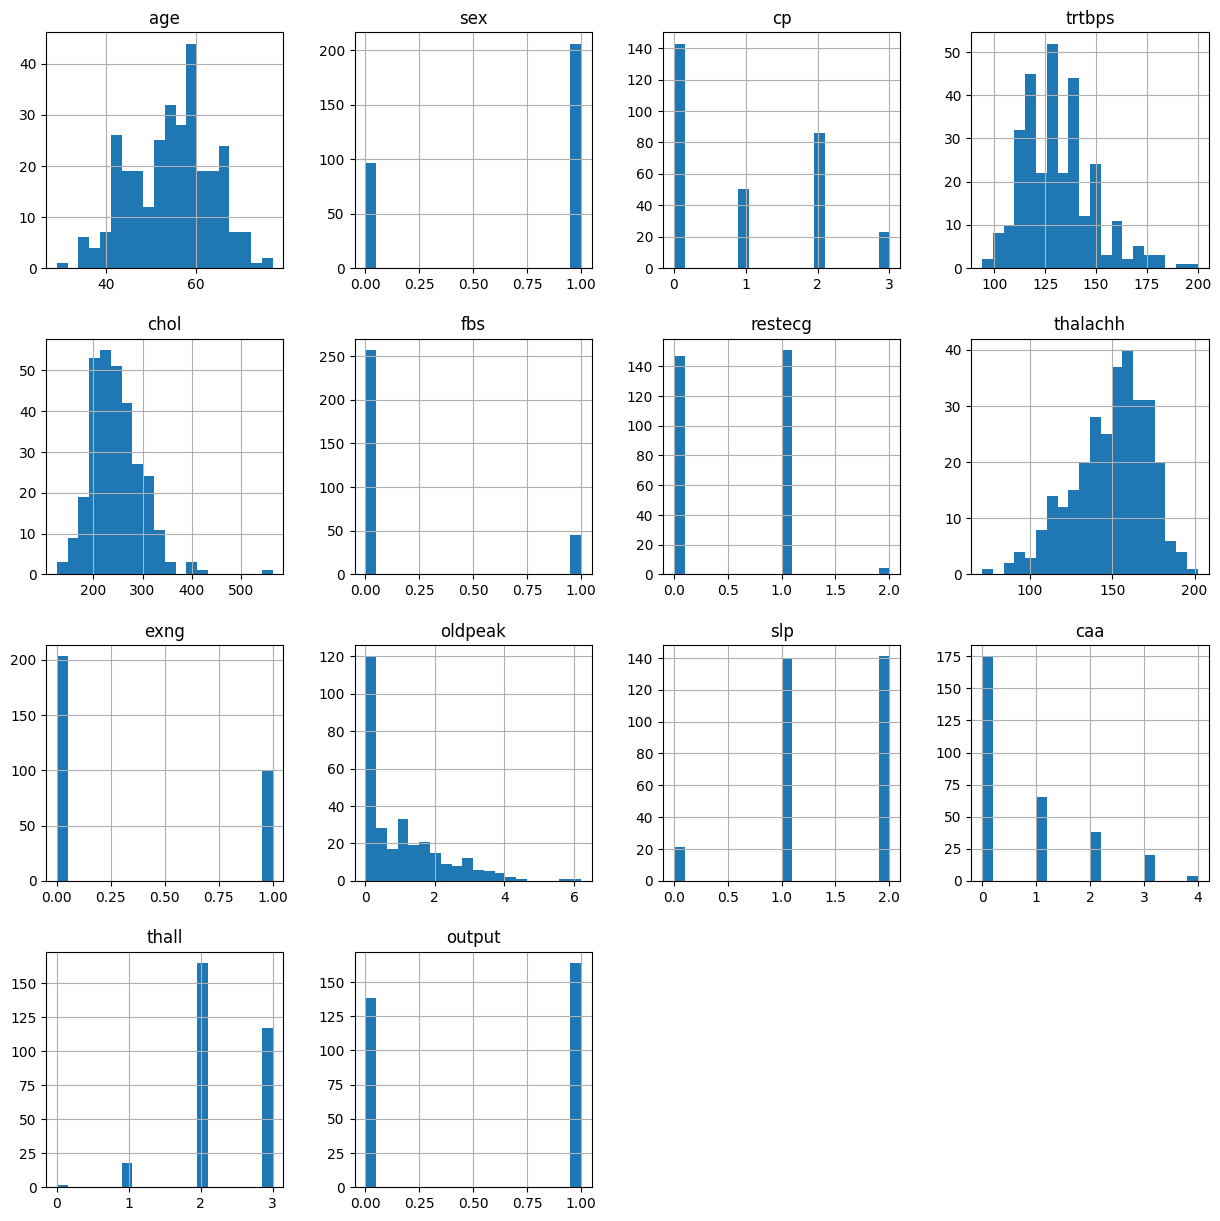

In [51]:
# ToDo plot distributions
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(15,15))
plt.show()

#### Correlations between features and target

Generate the correlation matrix for all features. Select the correlations with the target value `output` and print the list of correlation values. Look at **Lecture 3** to find out how to produce this output.


In [52]:
# ToDo print correlation values
corr_matrix = df.corr(numeric_only = True)
corr_matrix['output'].sort_values(ascending=False)

output      1.000000
cp          0.432080
thalachh    0.419955
slp         0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trtbps     -0.146269
age        -0.221476
sex        -0.283609
thall      -0.343101
caa        -0.408992
oldpeak    -0.429146
exng       -0.435601
Name: output, dtype: float64

#### ToDo: Summarise your observations from the EDA

ToDo: What do you observe about your dataset?

# Exploratory Data Analysis (EDA) Observations

## 1. Dataset Overview
- The dataset contains **302 rows and 14 columns**.
- No **missing/null values** were found.
- No **duplicates** remain after cleaning.
- The dataset includes a mix of **numerical** and **categorical** features.

## 2. Feature Distributions
- `age` mostly ranges between **40–65 years**, with a few younger and older participants.
- Most participants have **normal to slightly elevated cholesterol** and **resting blood pressure**.
- Features like `cp`, `exng`, `fbs`, and `sex` are **categorical/binary**.

## 3. Target Variable (`output`)
- The target variable is **relatively balanced** between heart attack (1) and no heart attack (0) cases.

## 4. Correlations with Target
- **Strong positive correlation**:
  - `cp` (chest pain type) → 0.43  
  - `thalachh` (max heart rate achieved) → 0.42  
  - `slp` (slope) → 0.34
- **Strong negative correlation**:
  - `exng` (exercise-induced angina) → -0.44  
  - `oldpeak` → -0.43  
  - `caa` (number of major vessels) → -0.41
- **Weak correlations**:
  - `fbs` → -0.03  
  - `chol` → -0.08  

## 5. Insights
- Features related to **heart function and stress test results** are more predictive of heart attacks than general measures like cholesterol or fasting blood sugar.
- Categorical features (`cp`, `restecg`, `slp`, `thall`) should be **one-hot encoded** before modeling.
- Tree-based models might capture **feature interactions** better than linear models.


# Data preprocessing

## Testing different models

In order to find the best model for your classifier, you can experiment with a list of models to find out which ones are the most promissing. This process can be time consuming. In a real world case, if you have a large dataset, this step can be performed over a smaller sample of your dataset. Once you have narrowed down the model your will be working with, you can then work over the whole datset.

In this case our dataset is samll and you can work with the whole dataset.

Models to experiment with:
- Naive Bayes - Gaussian (some features are continuous values)
- Naive Bayes - Bernoulli (many features are discrete values)
- Random Forest
- K-NN
- XGBoost - Extreme Gradient Boosting model

In [13]:
# Load packages

# Load packages
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

### Feature scaling

For K-nn we will need to scale our feature values. We can `train` a scaler on our dataset, and then we can apply scaling when we train these classifiers.

In [14]:
# Prepare the feature scaler
X = df.iloc[:, 1:-1].values

In [15]:
y = df.iloc[:, -1].values

In [16]:
# Prepare the feature scaler
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
scaler = StandardScaler()
scaler.fit(X)


StandardScaler()

### Split training / testing data

Using 80-20 split.

In [17]:
# Split training / testing sets
# Split training / testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Gaussian Naive Bayes



In [18]:
# Train the Gaussian NB model
from sklearn.metrics import f1_score
gNB = GaussianNB()
gNB.fit(X_train, y_train)
predicted = gNB.predict(X_test)
print('The f1 score of Gaussian Naive Bayes model is: ', f1_score(y_test, predicted))

The f1 score of Gaussian Naive Bayes model is:  0.8524590163934426


### Bernulli Naive Bayes

Classifier `BernoulliNB()`

In [19]:
# ToDo train and test the BernulliNB classifier
# ToDo train and test the BernulliNB classifier
bNB = BernoulliNB()
bNB.fit(X_train, y_train)
pred = bNB.predict(X_test)
print('The f1 score of Bernulli Naive Bayes model is: ', f1_score(y_test, pred))

The f1 score of Bernulli Naive Bayes model is:  0.875


### K-NN

We need to apply the scaler when we feed the training and testing data.

Check documentation for [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [20]:
# Train and test a K-NN classifier using 1 neighbour as parameter.
model = KNeighborsClassifier(n_neighbors = 1)
# Apply scaling to the feature vector
model.fit(scaler.transform(X_train), y_train)
predicted = model.predict(scaler.transform(X_test))
print("The f1 score of KNN is : ", f1_score(y_test, predicted.round()))


The f1 score of KNN is :  0.8135593220338982


## Random Forest

Check documentation for [RandomForestClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

Secify `n_estimators` to be 100.
Specify a value for `random_state` to get repeatable results.

In [21]:
# ToDo: Train and test RandomForest classifier

rfc= RandomForestClassifier(n_estimators = 100, random_state = 0)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

In [22]:
print("The f1 score of random forest is : ", f1_score(y_test, pred))

The f1 score of random forest is :  0.870967741935484


## XGBoost

Train [XGBoostClassifier](https://xgboost.readthedocs.io/en/stable/python/python_api.html). We don't pass any parameters (leave it to use the defaults).

In [23]:

# The following line creates the classifier
xGB = xgb.XGBClassifier()
xGB.fit(X_train,y_train)
pred = xGB.predict(X_test)
# ToDo: Train and test XGBoost classifier


In [24]:
print("The f1 score ofxgboost forest is : ", f1_score(y_test, pred))

The f1 score ofxgboost forest is :  0.8387096774193549


### Findings
**ToDo:** Rank the classifiers by best performance (indicate their f1 score)



# Findings: Classifier Performance Ranking

| Rank | Classifier                | F1 Score |
|------|--------------------------|----------|
| 1    | Bernoulli Naive Bayes     | 0.875    |
| 2    | Random Forest             | 0.871    |
| 3    | Gaussian Naive Bayes      | 0.852    |
| 4    | XGBoost                   | 0.839    |
| 5    | K-Nearest Neighbors (K-NN)| 0.814    |

**Observations:**
- **Bernoulli Naive Bayes** performed best, likely because many features are binary/discrete.
- **Random Forest** is also very strong, capturing feature interactions effectively.
- K-NN performed the worst in this experiment, possibly due to small k and dataset size.
- Overall, **tree-based and probabilistic models** are most suitable for predicting heart attacks in this dataset.


## Observation

The initial attempt has created a ranking on the performance of the classifiers.

However, these values depend heavily on the random split between training and testing. We cannot trust these results entirely.

A more reliable result would be to use cross validation.

## Use Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score

### Gaussian Naive Bayes


In [26]:
# evaluate with cross validation
model = GaussianNB()
scores = cross_val_score(model, X,y,cv=10, scoring='f1')

In [27]:
print("F1 score: %0.4f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

F1 score: 0.8429 with a standard deviation of 0.06


### Bernulli Naive Bayes

ToDo: evaluate the classifier.

In [28]:
#ToDo: evaluate with cross validation
# evaluate with cross validation
model = BernoulliNB()
scores = cross_val_score(model, X,y,cv=10, scoring='f1')

In [29]:
print("F1 score: %0.4f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

F1 score: 0.8345 with a standard deviation of 0.04


### K-NN

In [30]:
# You need to pass the features through the scaler
# evaluate with cross validation
model = KNeighborsClassifier(n_neighbors = 1) 

scores = cross_val_score(model, scaler.fit_transform(X),y,cv=10, scoring='f1')

In [31]:
print("F1 score: %0.4f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

F1 score: 0.7795 with a standard deviation of 0.07


### XGBoosting


In [32]:
#ToDo: evaluate with cross validation
# evaluate with cross validation
model =  xgb.XGBClassifier()
scores = cross_val_score(model, X,y,cv=10, scoring='f1')

In [33]:
print("F1 score: %0.4f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

F1 score: 0.8130 with a standard deviation of 0.07


### Random Forest

In [34]:
#ToDo: evaluate with cross validation
model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
scores = cross_val_score(model, X,y,cv=10, scoring='f1')

In [35]:
print("F1 score: %0.4f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

F1 score: 0.8446 with a standard deviation of 0.05


### Findings

ToDo: Ranking best performance



# Cross-Validation Results (10-Fold)

| Classifier                | F1 Score (mean) | Standard Deviation |
|----------------------------|----------------|------------------|
| Random Forest             | 0.8446         | 0.05             |
| Gaussian Naive Bayes      | 0.8429         | 0.06             |
| Bernoulli Naive Bayes     | 0.8345         | 0.04             |
| XGBoost                   | 0.8130         | 0.07             |
| K-Nearest Neighbors (K-NN)| 0.7795         | 0.07             |

## Observations:
- **Random Forest** achieved the highest F1 score with moderate variation, indicating strong and stable performance across folds.
- **Gaussian NB** and **Bernoulli NB** also performed well, showing the dataset suits probabilistic models.
- **K-NN** had the lowest F1 score and highest variation, suggesting sensitivity to data splits and feature scaling.
- **XGBoost** performed moderately, slightly lower than tree-based Random Forest in this case.
- Overall, **Random Forest and Naive Bayes classifiers** are the most reliable choices for this dataset.


### Observation
The performance has changed. But these measurements are more reliable. They reflect better the actual performance of each model.

However, these results are not the best these models can achieve. We can move to parameter fine tuning to push each model to its best performance.

## Parameter Fine Tuning

### Gaussian Naive Bayes

For the GaussianNB we can fine tune the parameter `var_smoothing`. Check documentation for more details.

We define a range of values using a logarithimic range between log(0) and log(-9).

In [36]:
import numpy as np

In [37]:
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
 param_grid=params_NB,
 cv=5, # use any cross validation technique
 verbose=1,
 scoring='f1')
gs_NB.fit(X_train, y_train)
# Fine tuning for Gaussian NB


Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1', verbose=1)

In [38]:
gs_NB.best_params_

{'var_smoothing': 5.3366992312063123e-05}

In [39]:
model = GaussianNB(var_smoothing=0.0000533669923120631)
scores = cross_val_score(model, X, y, cv=10, scoring="f1")


In [40]:
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.8595 f1 with a standard deviation of 0.07


In [42]:
# ToDo: training the model using the specified value for the parameter

model = GaussianNB(var_smoothing= 5.3366992312063123e-05)
scores = cross_val_score(model, X, y, cv=10, scoring="f1")

print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.8595 f1 with a standard deviation of 0.07


### Bernoulli Naive Bayes

Fine tune the parameter `alpha` for the BernoulliNB. Using a linear range between ~0.000 and 20.

In [55]:
# Prepare fine tuning
bnb_classifier = BernoulliNB()
params_BNB = {'alpha': np.linspace(1/1000000, 20.0, 400)}
gs_BNB = GridSearchCV(estimator=bnb_classifier,
 param_grid=params_BNB,
 cv=5, # use any cross validation technique
 verbose=1,
 scoring='f1')
gs_BNB.fit(X_train, y_train)
gs_BNB.best_params_


#ToDo: perform grid search and get the best parameters.


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


{'alpha': 15.037594233082704}

In [56]:
# ToDo: training the model using the specified value for the parameter
model = BernoulliNB(alpha=15.037594233082704)
scores = cross_val_score(model, X, y, cv=10, scoring="f1")



In [58]:
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.8385 f1 with a standard deviation of 0.04


### Random Forest

For the random forest there are many parameters we can tune. We can explore the following:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

### CAUTION!
This code will take some time to complete!

In [59]:
# Prepare fine tuning
rf_classifier = RandomForestClassifier()
params_RF = {
 'n_estimators': [100, 200, 300],
 'criterion': ['gini', 'entropy'],
 'max_depth': [None, 12, 10, 8],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['sqrt', 'log2']
}
gs_RF = GridSearchCV(
 estimator=rf_classifier,
 param_grid=params_RF,
 cv=5, # use any cross validation technique
 verbose=1,
 scoring='f1')
gs_RF.fit(X_train, y_train)
gs_RF.best_params_
#ToDo: perform grid search and get the best parameters.

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 100}

In [63]:
# ToDo: Train the classifier, passing the parameter values that came out of the grid search. And then evaluate.
model = RandomForestClassifier(
 criterion='gini',
 max_depth = 10,
 max_features = 'sqrt',
 min_samples_leaf = 4,
 min_samples_split = 2,
 n_estimators = 100
 )
scores = cross_val_score(model, X, y, cv=5, scoring="f1")

In [64]:
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.8624 f1 with a standard deviation of 0.02


### K-NN

We can fine tune the parameters `n_neighbors` and `p`. Check the documentation for more details.

In [65]:
# Prepare fine tuning

#ToDo: perform grid search and get the best parameters.
knn_classifier = KNeighborsClassifier()
params_KNN = {
 'n_neighbors': [1, 2, 3, 4, 5],
 'p': [1, 2, 3]
}
gs_KNN = GridSearchCV(
 estimator=knn_classifier,
 param_grid=params_KNN,
 cv=5, # use any cross validation technique
 verbose=1,
 scoring='f1')
gs_KNN.fit(scaler.transform(X_train), y_train)
gs_KNN.best_params_


Fitting 5 folds for each of 15 candidates, totalling 75 fits


{'n_neighbors': 5, 'p': 1}

In [66]:
# ToDo: train and evaluate the classifier passing the right parameters
model = KNeighborsClassifier(n_neighbors = 5, p=1) 
scores = cross_val_score(model, scaler.transform(X), y, cv=5, scoring="f1")

In [67]:
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.8343 f1 with a standard deviation of 0.03


### XGBoost
XGBoost supports many parameters. We will only focus on a few (to reduce the time it takes to run)

We can fine-tune the following parameters:
- max_depth
- learning_rate
- subsample


In [70]:
# Prepare fine tuning
xg_classifier = xgb.XGBClassifier()
params_XG = {
 'max_depth': [2, 3, 4, 5],
 'learning_rate': [0.2, 0.1, 0.01],
 'subsample': [0.1, 0.2, 0.5, 0.7]
}
gs_XG = GridSearchCV(
 estimator=xg_classifier,
 param_grid=params_XG,
 cv=5, # use any cross validation technique
 verbose=1,
 scoring='f1')
gs_XG.fit(X_train, y_train)
gs_XG.best_params_
#ToDo: perform grid search and get the best parameters.

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.2}

In [72]:
# ToDo: train and evaluate the classifier passing the right parameters
# ToDo: train and evaluate the classifier passing the right parameters
model = xgb.XGBClassifier(learning_rate= 0.01, max_depth= 3, subsample= 0.2) 
scores = cross_val_score(model, scaler.transform(X), y, cv=5, scoring="f1")

In [73]:
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.8568 f1 with a standard deviation of 0.03


### Findings
Ranking best performance



# Final Findings: Classifier Performance Ranking (After Fine-Tuning)

| Rank | Classifier                | F1 Score (mean) | Standard Deviation |
|------|---------------------------|----------------|------------------|
| 1    | Random Forest             | 0.8624         | 0.02             |
| 2    | Gaussian Naive Bayes      | 0.8595         | 0.07             |
| 3    | XGBoost                   | 0.8568         | 0.03             |
| 4    | Bernoulli Naive Bayes     | 0.8385         | 0.04             |
| 5    | K-Nearest Neighbors (K-NN)| 0.8343         | 0.03             |

## Observations:
- **Random Forest** is the best performing model with the highest F1 score and low variation, making it reliable and stable.
- **Gaussian Naive Bayes** also performs very well, showing that probabilistic models handle this dataset effectively.
- **XGBoost** is competitive, slightly below Random Forest, but benefits from gradient boosting.
- **K-NN** and **Bernoulli NB** are moderate performers, suitable if interpretability or simplicity is prioritized.
- Fine-tuning parameters improved performance for all classifiers compared to default settings.


## Final observations

The final performance of the models is different to what we observed at the beginning.

Going through the cross validation and parameter fine tuning is important before we choose the best model for our dataset.

# Final Observations

The final performance of the models differs from the initial results obtained using a simple train/test split.  

This exercise highlights that **cross-validation and parameter fine-tuning are essential** steps before selecting the best model for a dataset. They help:

- Provide a more reliable estimate of model performance.
- Reduce overfitting to a single train/test split.
- Optimize model parameters to achieve the highest possible predictive performance.

Overall, the analysis shows that **Random Forest and Gaussian Naive Bayes** are the most suitable models for predicting heart attacks in this dataset after fine-tuning.
